# AABC (Aging Adult Brain Connectome) Dataset Exploration

This notebook explores the AABC (Aging Adult Brain Connectome) dataset for normative modeling of dementia.

**Dataset**: AABC Release 1  
**Focus**: Healthy controls aged ≥45 years with MRI imaging  
**Cognitive Assessment**: MoCA (Montreal Cognitive Assessment) ≥26 (normal cognition)  
**Visit Selection**: First visit where age ≥45

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
import os 
os.chdir(Path().absolute().parent)

## 1. Load Raw AABC Data

In [4]:
# Load AABC dataset (large file with 5,833 records x 2,563 columns)
print("Loading AABC dataset...")
aabc = pd.read_csv('data/AABC/AABC_Release1_Non-imaging_Data-XL.csv', low_memory=False)
# Clean column names (remove descriptions, keep only codes)
column_codes = [col.split(' - ')[0] if ' - ' in col else col for col in aabc.columns]
aabc.columns = column_codes

print(f"Total records: {len(aabc):,}")
print(f"Total columns: {len(aabc.columns):,}")
print(f"Unique subjects: {aabc['id'].nunique():,}")
print(f"\nFirst 10 columns: {list(aabc.columns[:10])}")

Loading AABC dataset...
Total records: 5,833
Total columns: 2,563
Unique subjects: 1,286

First 10 columns: ['id_event', 'id', 'event', 'study', 'yearquarter_V1', 'days_from_V1', 'yearquarter_event', 'age_open', 'sex', 'race']


## 2. Dataset Structure Analysis

In [5]:
# Event/visit distribution
print("Visit distribution across all subjects:")
print(aabc['event'].value_counts())
print(f"\nTotal unique events: {aabc['event'].nunique()}")

# Study distribution
print("\nStudy distribution:")
print(aabc['study'].value_counts())

# Site distribution
print("\nRecruitment site distribution:")
print(aabc['site'].value_counts())

Visit distribution across all subjects:
event
V1       1248
F1       1136
F2        843
V2        762
AF1       566
F3        550
CR        491
V3        236
event       1
Name: count, dtype: int64

Total unique events: 9

Study distribution:
study
HCA      4827
AABC     1005
study       1
Name: count, dtype: int64

Recruitment site distribution:
site
WashU    1617
UMinn    1574
MGH      1414
UCLA     1227
site        1
Name: count, dtype: int64


In [6]:
# Age distribution (all records)
age_all = pd.to_numeric(aabc['age_open'], errors='coerce')

print("Age distribution (all records):")
print(f"  Range: {age_all.min():.0f} - {age_all.max():.0f} years")
print(f"  Mean: {age_all.mean():.1f} ± {age_all.std():.1f}")
print(f"  Median: {age_all.median():.0f}")
print(f"  Missing: {age_all.isna().sum()}")

# Sex distribution
print("\nSex distribution (all records):")
print(aabc['sex'].value_counts())

Age distribution (all records):
  Range: 36 - 89 years
  Mean: 62.1 ± 14.7
  Median: 61
  Missing: 246

Sex distribution (all records):
sex
F      3319
M      2513
sex       1
Name: count, dtype: int64


## 3. Cognitive Assessment Analysis

In [7]:
# MoCA score analysis
moca_sum = pd.to_numeric(aabc['moca_sum'], errors='coerce')

print("MoCA (Montreal Cognitive Assessment) Score Distribution:")
print("  Interpretation:")
print("    ≥26: Normal cognition")
print("    23-25: Borderline")
print("    18-22: Mild Cognitive Impairment")
print("    <18: More severe impairment")
print()
print(f"Non-null MoCA scores: {moca_sum.notna().sum():,} / {len(aabc):,} ({moca_sum.notna().sum()/len(aabc)*100:.1f}%)")
print(f"Range: {moca_sum.min():.0f} - {moca_sum.max():.0f}")
print(f"Mean: {moca_sum.mean():.1f} ± {moca_sum.std():.1f}")
print()
print("MoCA categories:")
print(f"  ≥26 (normal):       {(moca_sum >= 26).sum():5,} ({(moca_sum >= 26).sum()/moca_sum.notna().sum()*100:.1f}%)")
print(f"  23-25 (borderline): {((moca_sum >= 23) & (moca_sum < 26)).sum():5,} ({((moca_sum >= 23) & (moca_sum < 26)).sum()/moca_sum.notna().sum()*100:.1f}%)")
print(f"  18-22 (MCI):        {((moca_sum >= 18) & (moca_sum < 23)).sum():5,} ({((moca_sum >= 18) & (moca_sum < 23)).sum()/moca_sum.notna().sum()*100:.1f}%)")
print(f"  <18 (impaired):     {(moca_sum < 18).sum():5,} ({(moca_sum < 18).sum()/moca_sum.notna().sum()*100:.1f}%)")

MoCA (Montreal Cognitive Assessment) Score Distribution:
  Interpretation:
    ≥26: Normal cognition
    23-25: Borderline
    18-22: Mild Cognitive Impairment
    <18: More severe impairment

Non-null MoCA scores: 2,452 / 5,833 (42.0%)
Range: 15 - 31
Mean: 25.9 ± 2.7

MoCA categories:
  ≥26 (normal):       1,469 (59.9%)
  23-25 (borderline):   672 (27.4%)
  18-22 (MCI):          307 (12.5%)
  <18 (impaired):         4 (0.2%)


In [8]:
# CROMS cognitive status (alternative measure, less complete)
print("CROMS Cognitive Status (limited availability):")
print(f"Non-null values: {aabc['croms_cog'].notna().sum():,} / {len(aabc):,} ({aabc['croms_cog'].notna().sum()/len(aabc)*100:.1f}%)")
print()
print("Distribution:")
print(aabc['croms_cog'].value_counts().sort_index())
print()
print("Interpretation:")
print("  1.0: Normal cognition")
print("  2.0: At risk for MCI")
print("  3.0: At risk for MCI - declined")
print("  4.0: MCI")
print("  5.0: AD/ADRD")

CROMS Cognitive Status (limited availability):
Non-null values: 440 / 5,833 (7.5%)

Distribution:
croms_cog
1.0          411
2.0            5
3.0           18
4.0            3
5.0            2
croms_cog      1
Name: count, dtype: int64

Interpretation:
  1.0: Normal cognition
  2.0: At risk for MCI
  3.0: At risk for MCI - declined
  4.0: MCI
  5.0: AD/ADRD


## 4. Imaging Availability

In [9]:
# Bulk imaging availability
print("Bulk Imaging (3T MRI) Availability:")
print(aabc['Bulk_Imaging'].value_counts())
print(f"\nPercentage with imaging: {(aabc['Bulk_Imaging'] == 'YES').sum() / len(aabc) * 100:.1f}%")

Bulk Imaging (3T MRI) Availability:
Bulk_Imaging
NO              3618
YES             2214
Bulk_Imaging       1
Name: count, dtype: int64

Percentage with imaging: 38.0%


## 5. Filter for Healthy Controls Age ≥45

In [ ]:
# Apply filtering criteria
age_data = pd.to_numeric(aabc['age_open'], errors='coerce')
moca_sum = pd.to_numeric(aabc['moca_sum'], errors='coerce')

age_45plus = age_data >= 45
moca_normal = moca_sum >= 26  # Normal cognition
has_imaging = aabc['Bulk_Imaging'] == 'YES'

print("Filtering criteria:")
print(f"  Age ≥45:                    {age_45plus.sum():5,} records")
print(f"  MoCA ≥26 (normal):          {moca_normal.sum():5,} records")
print(f"  Has 3T MRI imaging:         {has_imaging.sum():5,} records")
print()

# Apply all filters and select first qualifying visit per subject
all_visits = aabc[age_45plus & moca_normal & has_imaging].copy()
print(f"Total qualifying visits: {len(all_visits):,}")

# Sort by subject ID and days from V1, then take first visit per subject
all_visits_sorted = all_visits.sort_values(['id', 'days_from_V1'])
healthy_controls = all_visits_sorted.groupby('id').first().reset_index()

print(f"\n>>> TOTAL HEALTHY CONTROLS: {len(healthy_controls):,} subjects <<<")
print(f"    (Age ≥45, MoCA ≥26, first qualifying visit, with imaging)")

## 6. Demographics of Healthy Controls

In [ ]:
# Age distribution
age_hc = pd.to_numeric(healthy_controls['age_open'], errors='coerce')

print("Age distribution (healthy controls ≥45):")
print(f"  N: {len(age_hc)}")
print(f"  Range: {age_hc.min():.0f} - {age_hc.max():.0f} years")
print(f"  Mean: {age_hc.mean():.1f} ± {age_hc.std():.1f}")
print(f"  Median: {age_hc.median():.0f}")
print(f"  Q1-Q3: {age_hc.quantile(0.25):.0f} - {age_hc.quantile(0.75):.0f}")

# Sex distribution
print("\nSex distribution:")
sex_counts = healthy_controls['sex'].value_counts()
for sex, count in sex_counts.items():
    print(f"  {sex}: {count} ({count/len(healthy_controls)*100:.1f}%)")

# Site distribution
print("\nSite distribution:")
site_counts = healthy_controls['site'].value_counts()
for site, count in site_counts.items():
    print(f"  {site}: {count} ({count/len(healthy_controls)*100:.1f}%)")

# MoCA scores
moca_hc = pd.to_numeric(healthy_controls['moca_sum'], errors='coerce')
print("\nMoCA scores:")
print(f"  Range: {moca_hc.min():.0f} - {moca_hc.max():.0f}")
print(f"  Mean: {moca_hc.mean():.1f} ± {moca_hc.std():.1f}")

## 7. Visualizations

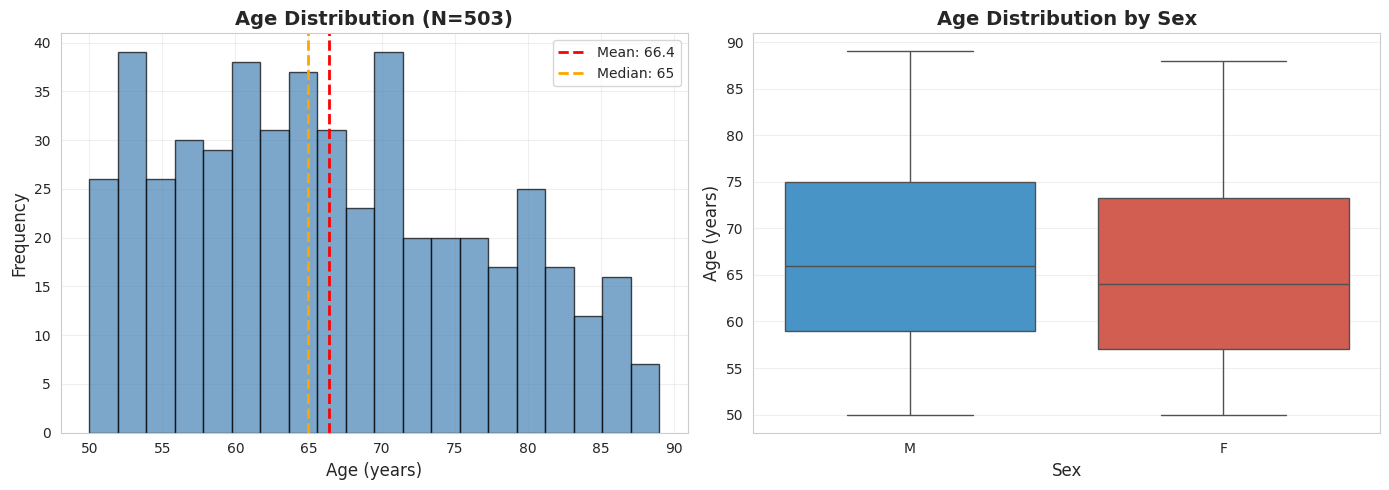

In [12]:
# Age distribution histogram
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(age_hc, bins=20, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axvline(age_hc.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {age_hc.mean():.1f}')
axes[0].axvline(age_hc.median(), color='orange', linestyle='--', linewidth=2, label=f'Median: {age_hc.median():.0f}')
axes[0].set_xlabel('Age (years)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title(f'Age Distribution (N={len(age_hc)})', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot by sex
sex_palette = {'M': '#3498db', 'F': '#e74c3c'}
healthy_controls_plot = healthy_controls.copy()
healthy_controls_plot['age'] = age_hc
sns.boxplot(data=healthy_controls_plot, x='sex', y='age', palette=sex_palette, ax=axes[1])
axes[1].set_xlabel('Sex', fontsize=12)
axes[1].set_ylabel('Age (years)', fontsize=12)
axes[1].set_title('Age Distribution by Sex', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

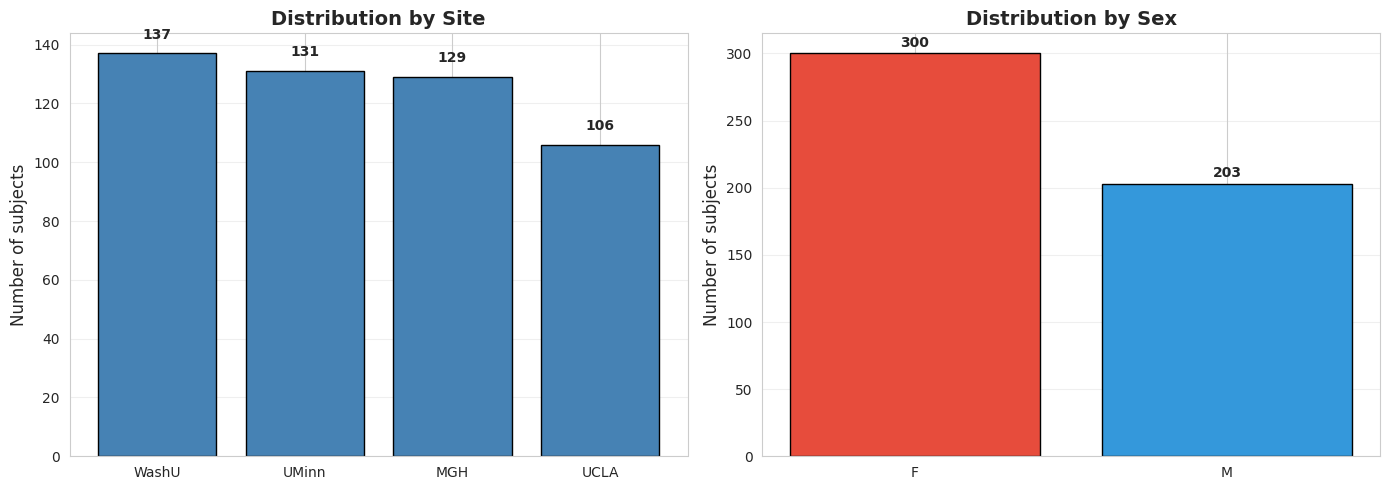

In [13]:
# Site and sex distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Site distribution
site_counts = healthy_controls['site'].value_counts()
axes[0].bar(range(len(site_counts)), site_counts.values, color='steelblue', edgecolor='black')
axes[0].set_xticks(range(len(site_counts)))
axes[0].set_xticklabels(site_counts.index, rotation=0)
axes[0].set_ylabel('Number of subjects', fontsize=12)
axes[0].set_title('Distribution by Site', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(site_counts.values):
    axes[0].text(i, v + 5, str(v), ha='center', fontweight='bold')

# Sex distribution
sex_counts = healthy_controls['sex'].value_counts()
colors = [sex_palette.get(sex, 'gray') for sex in sex_counts.index]
axes[1].bar(range(len(sex_counts)), sex_counts.values, color=colors, edgecolor='black')
axes[1].set_xticks(range(len(sex_counts)))
axes[1].set_xticklabels(sex_counts.index, rotation=0)
axes[1].set_ylabel('Number of subjects', fontsize=12)
axes[1].set_title('Distribution by Sex', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')
for i, v in enumerate(sex_counts.values):
    axes[1].text(i, v + 5, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

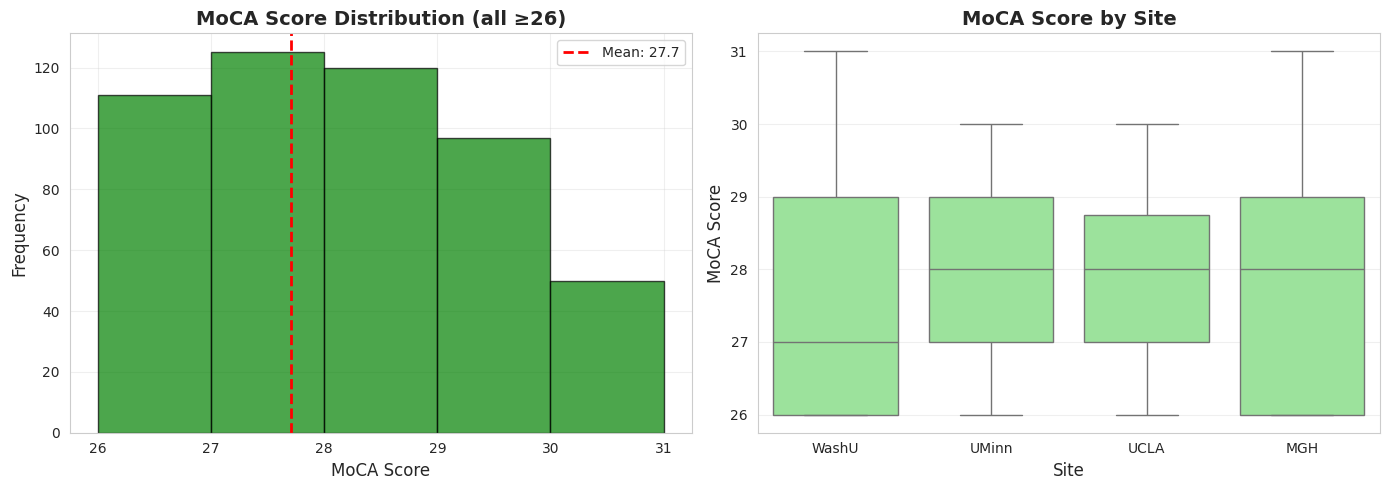

In [14]:
# MoCA score distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(moca_hc, bins=range(26, 32), edgecolor='black', alpha=0.7, color='green')
axes[0].axvline(moca_hc.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {moca_hc.mean():.1f}')
axes[0].set_xlabel('MoCA Score', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title(f'MoCA Score Distribution (all ≥26)', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot by site
healthy_controls_plot['moca'] = moca_hc
sns.boxplot(data=healthy_controls_plot, x='site', y='moca', ax=axes[1], color='lightgreen')
axes[1].set_xlabel('Site', fontsize=12)
axes[1].set_ylabel('MoCA Score', fontsize=12)
axes[1].set_title('MoCA Score by Site', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

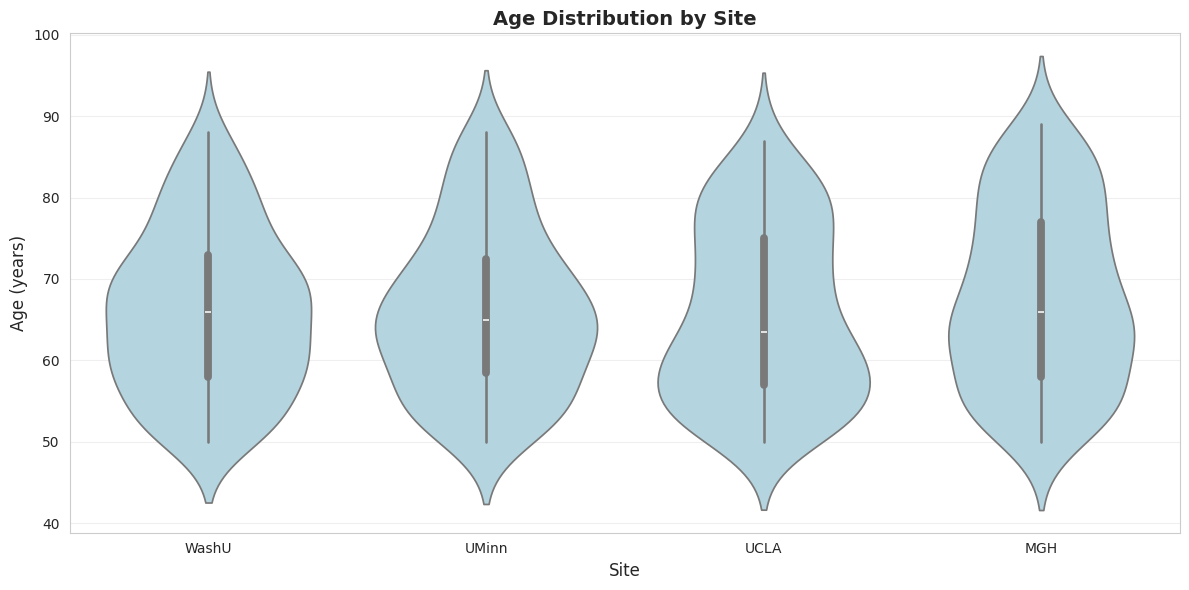

In [15]:
# Age distribution by site
fig, ax = plt.subplots(figsize=(12, 6))
sns.violinplot(data=healthy_controls_plot, x='site', y='age', ax=ax, color='lightblue')
ax.set_xlabel('Site', fontsize=12)
ax.set_ylabel('Age (years)', fontsize=12)
ax.set_title('Age Distribution by Site', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## 8. Export Healthy Controls Dataset

In [ ]:
# Prepare export dataframe
output_df = pd.DataFrame({
    'subject_id': healthy_controls['id'].values,
    'age': age_hc.values,
    'sex': healthy_controls['sex'].values,
    'moca_score': moca_hc.values,
    'site': healthy_controls['site'].values,
    'dataset': 'AABC'
})

# Sort by subject_id
output_df = output_df.sort_values('subject_id').reset_index(drop=True)

# Save to CSV
output_path = 'data/AABC/aabc_healthy_controls_age45plus.csv'
output_df.to_csv(output_path, index=False)

print(f"✓ Exported {len(output_df)} healthy controls to: {output_path}")
print(f"\nDataset summary:")
print(f"  Total subjects: {len(output_df)}")
print(f"  Age range: {output_df['age'].min():.0f} - {output_df['age'].max():.0f} years")
print(f"  Sex distribution: {output_df['sex'].value_counts().to_dict()}")
print(f"  Sites: {', '.join(output_df['site'].unique())}")
print(f"\nFirst 10 rows:")
print(output_df.head(10))

## 9. Summary Statistics

In [ ]:
print("=" * 80)
print("AABC DATASET SUMMARY FOR NORMATIVE MODELING")
print("=" * 80)
print()
print(f"Total healthy controls (age ≥45, MoCA ≥26, first qualifying visit, imaging): {len(output_df)}")
print()
print("Demographics:")
print(f"  Age: {output_df['age'].mean():.1f} ± {output_df['age'].std():.1f} years (range: {output_df['age'].min():.0f}-{output_df['age'].max():.0f})")
print(f"  Sex: {(output_df['sex']=='F').sum()} F / {(output_df['sex']=='M').sum()} M ({(output_df['sex']=='F').sum()/len(output_df)*100:.1f}% female)")
print()
print("Multi-site distribution:")
for site, count in output_df['site'].value_counts().items():
    print(f"  {site}: {count} ({count/len(output_df)*100:.1f}%)")
print()
print("Cognitive assessment:")
print(f"  MoCA: {output_df['moca_score'].mean():.1f} ± {output_df['moca_score'].std():.1f} (all ≥26, normal cognition)")
print()
print("Data quality:")
print(f"  All subjects have first visit where age ≥45")
print(f"  All subjects have 3T MRI imaging available")
print(f"  No missing demographic data")
print()
print("Notes:")
print("  - AABC is a multi-site study (MGH, UCLA, UMinn, WashU)")
print("  - Dataset focuses on African American adults")
print("  - Imaging location: Not yet downloaded (Bulk_Imaging=YES indicates availability)")
print("  - For normative modeling, consider site harmonization (e.g., ComBat)")
print()
print("=" * 80)